# Seller Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)


sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["font.size"] = 12

In [2]:
ecom_data_df = pd.read_parquet("../data/olist_ecom.parquet")

## Aggregate Seller Performance Metrics

In [ ]:
seller_summary = (
    ecom_data_df.groupby("seller_id")
    .agg(
        total_sales=("price", "sum"),
        total_freight=("freight_value", "sum"),
        total_orders=("order_id", "nunique"),
        avg_delivery_time=(
            "total_delivery_time",
            "mean",
        ),
        avg_delivery_vs_estimate=(
            "delivery_vs_estimate",
            "mean",
        ),  # if value is negative thats mean is good
    )
    .reset_index()
)

In [6]:
# calculate total revenue(price(total_sales) + freight(total_freight))
seller_summary["total_revenue"] = (
    seller_summary["total_sales"] + seller_summary["total_freight"]
)

In [8]:
print(f"Shape of seller_summary: {seller_summary.shape}")
display(seller_summary.sample(5))

Shape of seller_summary: (1347, 7)


,seller_id,total_sales,total_freight,total_orders,avg_delivery_time,avg_delivery_vs_estimate,total_revenue
1183,dfc475d54e1b6dbeeb7d7d9bdaa63827,375.80,92.03,3,7.576950,-13.067211,467.83
458,5962468f885ea01a1b6a97a218797b0a,149.00,16.48,1,9.642442,-16.304074,165.48
1210,e601b04acf48b4576e73ddca9481f0dc,16.49,18.23,1,6.263021,-24.390023,34.72
905,aaed1309374718fdd995ee4c58c9dfcd,495.20,89.81,5,9.975343,-16.168694,585.01
654,7a188843479798ca813108fa7b959286,49.90,8.72,1,NaN,NaN,58.62


## Identify Top/Bottom Sellers (Table Output)

In [9]:
top_sellers_by_revenue = seller_summary.sort_values(
    by="total_revenue", ascending=False
).head(10)

In [ ]:
print("Top 10 seller based total revenue")
display(top_sellers_by_revenue[["seller_id", "total_revenue", "total_orders"]])

Top 10 seller based total revenue


,seller_id,total_revenue,total_orders
371,4869f7a5dfa277a7dca6462dcf3b52b2,19515.53,91
670,7c67e1448b00f6e969d365cea6b010ab,18989.84,79
379,4a3ca9315b744ce9f8e9374361493884,18421.86,155
1319,fa1c13f2614d7b5c4749cbc52fecda94,18019.70,41
429,53243585a1d6dc2643021fd1853d8905,16861.98,23
680,7e93a43ef30c4f03f38b393420bc753a,14319.41,22
508,620c87c171fb2a6dd6e8bb4dec959fc6,10739.07,61
1307,f7ba60f8c3f99e7ee4042fdef03b70c4,10730.06,28
173,1f50f920176fa81dab994f9023523100,10259.04,117
1154,da8622b14eb17ae2831f4ac5b9dab84a,9940.69,93


In [16]:
top_sellers_by_orders = seller_summary.sort_values(
    by="total_orders", ascending=False
).head(10)

In [18]:
print("Top 10 seller based total orders")
display(top_sellers_by_orders[["seller_id", "total_revenue", "total_orders"]])

Top 10 seller based total orders


,seller_id,total_revenue,total_orders
379,4a3ca9315b744ce9f8e9374361493884,18421.86,155
173,1f50f920176fa81dab994f9023523100,10259.04,117
525,6560211a19b47992c3666cc44a7e94c0,8625.41,114
1077,cc419e0650a3c5ba77189a1882b7556a,7946.14,112
1154,da8622b14eb17ae2831f4ac5b9dab84a,9940.69,93
371,4869f7a5dfa277a7dca6462dcf3b52b2,19515.53,91
1237,ea8482cd71df3c1969d7b9473ff13abc,3905.84,87
670,7c67e1448b00f6e969d365cea6b010ab,18989.84,79
320,3d871de0142ce09b7081e2b9d1733cb1,7758.42,73
508,620c87c171fb2a6dd6e8bb4dec959fc6,10739.07,61


## Visualize Top Sellers by Total Revenue

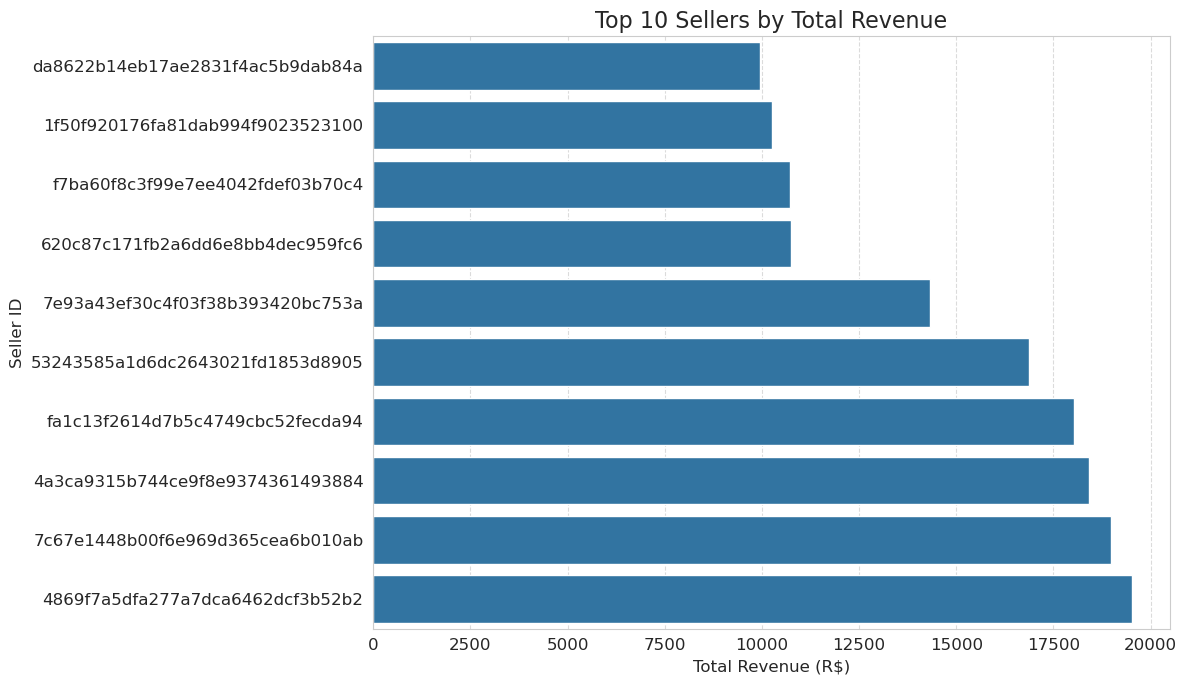

In [20]:
plt.figure(figsize=(12, 7))
sns.barplot(
    x="total_revenue",
    y="seller_id",
    data=top_sellers_by_revenue.sort_values(by="total_revenue", ascending=True),
)
plt.title("Top 10 Sellers by Total Revenue", fontsize=16)
plt.xlabel("Total Revenue (R$)", fontsize=12)
plt.ylabel("Seller ID", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig("top_10_sellers_revenue.png")  # Simpan plot
plt.show()